In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## ORB and SIFT Features

In [3]:
list_of_imgs = [str(i) for i in range(60)]


orb = cv2.ORB_create(nfeatures=200) # ORB feature generator
sift = cv2.xfeatures2d.SIFT_create(nfeatures=200) # SIFT feature generator

scale_percent = 10 # Scaling down images to 10% of original size
width = int(4000 * scale_percent / 100) # All images are of dimension: (3000,4000)
height = int(3000 * scale_percent / 100)
dim = (width, height)

des_orb = [0]*len(list_of_imgs)
des_sift = [0]*len(list_of_imgs)
for i in range(len(list_of_imgs)):
    img = cv2.imread('Dataset/'+list_of_imgs[i] + '.jpg',0) # Loading images from dataset
    img = cv2.resize(img,dim,interpolation=cv2.INTER_AREA) #Resized to (750,1000)
    kp,des_orb[i] = orb.detectAndCompute(img,None) # ORB features
    kp,des_sift[i] = sift.detectAndCompute(img,None) # SIFT features

## Feature Matching

In [4]:
def knn_match(des1,des2,k):
    # Funciton that returns the similarity between 2 descriptors for a given k.
    des1_repeat = np.repeat(des1[np.newaxis,:,:],des2.shape[0],axis=0) # Repeating features along a new dimension. Output dimension (500,500,32)
    des2_repeat = np.repeat(des2[:,np.newaxis,:],des1.shape[0],axis=1) # Repeating features along a new dimension, but not the same one as previous. Output dimension (500,500,32)
    distance = np.min(np.linalg.norm(des1_repeat-des2_repeat,2,axis=2),axis=0) # Computing Euclidean distance between the two and taking minimum.
    distance = np.sort(distance)[:k] # The distances are sorted and k features with minimum distances are kept.
    return sum(distance)

## ORB Feature Matching

In [4]:
k_values = [1,5,10,20,40,60,80]
avg_retrieval_accuracy_orb = []
for k in k_values:
    is_correct = [] 
    for i in range(len(des_orb)):
        correct = np.repeat(i//6,5) # Labels
        distances = [] # To store distances between query image and other images
        for j in range(len(des_orb)):
            if(i != j): # For images not the same as query image
                distances.append(knn_match(des_orb[i],des_orb[j],k))
                index = np.array(distances).argsort()[:5] # Argsort returns the indices that sort an array. Top-5 are kept.
        index = index//6 # To find the predicted scene number.
        is_correct.append(correct==index) # Comparing with labels
    accuracy = np.average(np.array(is_correct)) # Taking average of accuracies
    print("k = ",k,"Accuracy = ",accuracy*100,"%")
    avg_retrieval_accuracy_orb.append(accuracy)

k =  1 Accuracy =  37.0 %
k =  5 Accuracy =  44.333333333333336 %
k =  10 Accuracy =  44.333333333333336 %
k =  20 Accuracy =  43.333333333333336 %
k =  40 Accuracy =  43.0 %
k =  60 Accuracy =  40.33333333333333 %
k =  80 Accuracy =  41.333333333333336 %


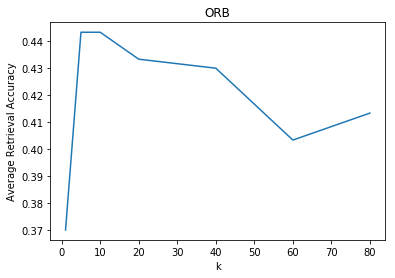

In [6]:
plt.plot(k_values,avg_retrieval_accuracy_orb)
plt.title('ORB')
plt.xlabel('k')
plt.ylabel('Average Retrieval Accuracy')
plt.show()sni

## SIFT Feature Matching

In [5]:
k_values = [1,5,10,20,40,60,80,200]# 500 are the maximum number of matches
avg_retrieval_accuracy_sift = []
for k in k_values:
    is_correct = []
    for i in range(len(des_sift)):
        correct = np.repeat(i//6,5)
        distances = []
        for j in range(len(des_sift)):
            if(i != j):
                distances.append(knn_match(des_sift[i],des_sift[j],k))
                index = np.array(distances).argsort()[:5]
        index = index//6
        is_correct.append(correct==index)
    accuracy = np.average(np.array(is_correct))
    print("k = ",k,"Accuracy = ",accuracy*100,"%")
    avg_retrieval_accuracy_sift.append(accuracy)

k =  1 Accuracy =  67.66666666666666 %
k =  5 Accuracy =  77.0 %
k =  10 Accuracy =  81.0 %
k =  20 Accuracy =  86.66666666666667 %
k =  40 Accuracy =  89.66666666666666 %
k =  60 Accuracy =  91.0 %
k =  80 Accuracy =  89.66666666666666 %
k =  500 Accuracy =  88.0 %


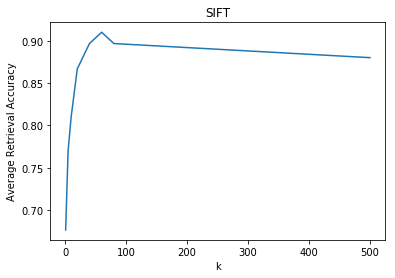

In [6]:
plt.plot(k_values,avg_retrieval_accuracy_sift)
plt.title('SIFT')
plt.xlabel('k')
plt.ylabel('Average Retrieval Accuracy')
plt.show()